<a href="https://colab.research.google.com/github/prp20/tensorflow_learning/blob/main/notebooks/nlp_practise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow_datasets as tfds

In [35]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [58]:
! kaggle datasets download -d falgunipatel19/biomedical-text-publication-classification

100% 55.9M/55.9M [00:05<00:00, 17.5MB/s]
100% 55.9M/55.9M [00:05<00:00, 10.2MB/s]


In [59]:
! unzip /content/biomedical-text-publication-classification.zip

Archive:  /content/biomedical-text-publication-classification.zip
  inflating: alldata_1_for_kaggle.csv  


In [62]:
dataset = pd.read_csv("/content/alldata_1_for_kaggle.csv", encoding='latin1')

In [63]:
dataset.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7570 non-null   int64 
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.5+ KB


In [67]:
#dataset = dataset.drop('Unnamed: 0', axis=1)
dataset

,0,a
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...
7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


In [69]:
sentences = dataset['a'].to_list()
labels = dataset['0'].to_numpy().reshape(-1,1)

In [70]:
labels

array([['Thyroid_Cancer'],
       ['Thyroid_Cancer'],
       ['Thyroid_Cancer'],
       ...,
       ['Colon_Cancer'],
       ['Colon_Cancer'],
       ['Colon_Cancer']], dtype=object)

In [72]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(sentences, labels, test_size=0.2, shuffle=True, random_state=42)
len(train_data), len(test_data), len(train_labels), len(test_labels)

(6056, 1514, 6056, 1514)

In [73]:
one_hot_encoder = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()

In [74]:
train_labels_one_hot = one_hot_encoder.fit_transform(train_labels)
test_labels_one_hot = one_hot_encoder.transform(test_labels)

train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:

NUM_CLASSES = len(label_encoder.classes_)
NUM_CLASSES

3

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])
model_0.fit(train_data, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [77]:
model_0_score = model_0.score(test_data, test_labels)

In [78]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {
      "accuracy": model_accuracy,
      "precision":model_precision,
      "recall": model_recall,
      "f1_score": model_f1_score
  }
  return model_results

def return_callbacks(model_name):
  callbacks_list = []
  callbacks_list.append(tf.keras.callbacks.ModelCheckpoint("saved_models/"+model_name, monitor='val_loss', save_best_only='True', verbose=1))
  callbacks_list.append(tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights='True'))
  return callbacks_list

In [79]:
model_0_preds = model_0.predict(test_data)
model_0_results = calculate_results(test_labels, model_0_preds)
model_results_dataset = {}
model_results_dataset['model_0'] = model_0_results
model_0_results

{'accuracy': 92.53632760898283,
 'precision': 0.9257391715264577,
 'recall': 0.9253632760898283,
 'f1_score': 0.9252128786513554}

In [80]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels_one_hot))

# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 3), dtype=tf.float64, name=None))>

In [81]:
from tensorflow.keras.layers import TextVectorization
output_seq_length = round(sum([len(i.split()) for i in train_data])/len(train_data))
tv_layer = TextVectorization(max_tokens=10000, standardize="lower_and_strip_punctuation", split="whitespace", output_mode="int", output_sequence_length=output_seq_length, pad_to_max_tokens=True)
tv_layer.adapt(train_data)

In [82]:
from tensorflow.keras import layers

embedding_layer = layers.Embedding(input_dim=10000, output_dim=128, input_length=output_seq_length)

In [83]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = tv_layer(inputs)
x = embedding_layer(x)
x = layers.GlobalAveragePooling1D()(x)
output = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model_1 = tf.keras.Model(inputs, output, name="nlp_model_1")
model_1.summary()

Model: "nlp_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 3478)             0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 3478, 128)         1280000   
                                                                 
 global_average_pooling1d_5   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_7 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1,280,387
Trainable params: 1,280,387
Non

In [84]:
model_1.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_1 = model_1.fit(train_dataset, epochs=20, validation_data=test_dataset, callbacks=return_callbacks(model_1.name))

Epoch 1/20
190/190 [==============================] - ETA: 0s - loss: 0.8542 - accuracy: 0.6126
Epoch 1: val_loss improved from inf to 0.72124, saving model to saved_models/nlp_model_1
190/190 [==============================] - 7s 34ms/step - loss: 0.8542 - accuracy: 0.6126 - val_loss: 0.7212 - val_accuracy: 0.6460
Epoch 2/20
188/190 [============================>.] - ETA: 0s - loss: 0.6166 - accuracy: 0.7979
Epoch 2: val_loss improved from 0.72124 to 0.54516, saving model to saved_models/nlp_model_1
190/190 [==============================] - 6s 33ms/step - loss: 0.6157 - accuracy: 0.7984 - val_loss: 0.5452 - val_accuracy: 0.8435
Epoch 3/20
190/190 [==============================] - ETA: 0s - loss: 0.4376 - accuracy: 0.8932
Epoch 3: val_loss improved from 0.54516 to 0.38925, saving model to saved_models/nlp_model_1
190/190 [==============================] - 6s 32ms/step - loss: 0.4376 - accuracy: 0.8932 - val_loss: 0.3892 - val_accuracy: 0.8930
Epoch 4/20
190/190 [=====================

In [85]:
model_1.evaluate(test_dataset)
model_1_loaded = tf.keras.models.load_model("saved_models/nlp_model_1")
model_1_preds = model_1_loaded.predict(test_dataset)
model_1_results = calculate_results(test_labels, tf.argmax(model_1_preds, axis=1))
model_results_dataset['model_1'] = model_1_results
model_1_results

48/48 [==============================] - 1s 19ms/step


{'accuracy': 95.70673712021136,
 'precision': 0.9573298296739985,
 'recall': 0.9570673712021136,
 'f1_score': 0.9570527182773984}

In [86]:
tf.keras.backend.clear_session()

In [87]:
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=10000, output_dim=128, embeddings_initializer="uniform", input_length=output_seq_length, name="embedding_2")

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = tv_layer(inputs)
x = model_2_embedding(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model_2 = tf.keras.Model(inputs, output, name="nlp_model_2")
model_2.summary()

Model: "nlp_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 3478)             0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 3478, 128)         1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 

In [88]:
model_2.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_2 = model_2.fit(train_dataset, epochs=20, validation_data=test_dataset,callbacks=return_callbacks(model_2.name))

Epoch 1/20
188/190 [============================>.] - ETA: 0s - loss: 0.7445 - accuracy: 0.6509
Epoch 1: val_loss improved from inf to 0.55177, saving model to saved_models/nlp_model_2
190/190 [==============================] - 7s 35ms/step - loss: 0.7430 - accuracy: 0.6514 - val_loss: 0.5518 - val_accuracy: 0.7358
Epoch 2/20
189/190 [============================>.] - ETA: 0s - loss: 0.3900 - accuracy: 0.8674
Epoch 2: val_loss improved from 0.55177 to 0.26846, saving model to saved_models/nlp_model_2
190/190 [==============================] - 6s 32ms/step - loss: 0.3896 - accuracy: 0.8676 - val_loss: 0.2685 - val_accuracy: 0.9055
Epoch 3/20
188/190 [============================>.] - ETA: 0s - loss: 0.1774 - accuracy: 0.9310
Epoch 3: val_loss improved from 0.26846 to 0.14936, saving model to saved_models/nlp_model_2
190/190 [==============================] - 6s 31ms/step - loss: 0.1767 - accuracy: 0.9313 - val_loss: 0.1494 - val_accuracy: 0.9306
Epoch 4/20
189/190 [=====================

In [89]:
model_2.evaluate(test_dataset)
model_2_loaded = tf.keras.models.load_model("saved_models/nlp_model_2")
model_2_preds = model_2_loaded.predict(test_dataset)
model_2_results = calculate_results(test_labels, tf.argmax(model_2_preds, axis=1))
model_results_dataset['model_2'] = model_2_results
model_2_results

48/48 [==============================] - 1s 19ms/step


{'accuracy': 97.42404227212683,
 'precision': 0.9745113504055504,
 'recall': 0.9742404227212682,
 'f1_score': 0.9742080473274934}

In [90]:
tf.keras.backend.clear_session()

In [91]:
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=10000, output_dim=128, embeddings_initializer="uniform", input_length=output_seq_length, name="embedding_2")

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = tv_layer(inputs)
x = model_3_embedding(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model_3 = tf.keras.Model(inputs, output, name="nlp_model_3")
model_3.summary()

Model: "nlp_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 3478)             0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 3478, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                       

In [92]:
model_3.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_3 = model_3.fit(train_dataset, epochs=20, validation_data=test_dataset,callbacks=return_callbacks(model_3.name))

Epoch 1/20
190/190 [==============================] - ETA: 0s - loss: 0.6330 - accuracy: 0.7442
Epoch 1: val_loss improved from inf to 0.36036, saving model to saved_models/nlp_model_3


190/190 [==============================] - 39s 182ms/step - loss: 0.6330 - accuracy: 0.7442 - val_loss: 0.3604 - val_accuracy: 0.8686
Epoch 2/20
190/190 [==============================] - ETA: 0s - loss: 0.3217 - accuracy: 0.8905
Epoch 2: val_loss improved from 0.36036 to 0.30676, saving model to saved_models/nlp_model_3


190/190 [==============================] - 33s 175ms/step - loss: 0.3217 - accuracy: 0.8905 - val_loss: 0.3068 - val_accuracy: 0.8904
Epoch 3/20
190/190 [==============================] - ETA: 0s - loss: 0.2949 - accuracy: 0.8988
Epoch 3: val_loss improved from 0.30676 to 0.29227, saving model to saved_models/nlp_model_3


190/190 [==============================] - 33s 172ms/step - loss: 0.2949 - accuracy: 0.8988 - val_loss: 0.2923 - val_accuracy: 0.8937
Epoch 4/20
190/190 [==============================] - ETA: 0s - loss: 0.2866 - accuracy: 0.9006
Epoch 4: val_loss improved from 0.29227 to 0.28272, saving model to saved_models/nlp_model_3


190/190 [==============================] - 33s 174ms/step - loss: 0.2866 - accuracy: 0.9006 - val_loss: 0.2827 - val_accuracy: 0.8937
Epoch 5/20
190/190 [==============================] - ETA: 0s - loss: 0.2821 - accuracy: 0.9013
Epoch 5: val_loss improved from 0.28272 to 0.28064, saving model to saved_models/nlp_model_3


190/190 [==============================] - 33s 171ms/step - loss: 0.2821 - accuracy: 0.9013 - val_loss: 0.2806 - val_accuracy: 0.8937
Epoch 6/20
190/190 [==============================] - ETA: 0s - loss: 0.2809 - accuracy: 0.9009
Epoch 6: val_loss improved from 0.28064 to 0.27936, saving model to saved_models/nlp_model_3


190/190 [==============================] - 31s 164ms/step - loss: 0.2809 - accuracy: 0.9009 - val_loss: 0.2794 - val_accuracy: 0.8943
Epoch 7/20
190/190 [==============================] - ETA: 0s - loss: 0.2757 - accuracy: 0.9024
Epoch 7: val_loss did not improve from 0.27936
190/190 [==============================] - 26s 137ms/step - loss: 0.2757 - accuracy: 0.9024 - val_loss: 0.2795 - val_accuracy: 0.8950
Epoch 8/20
190/190 [==============================] - ETA: 0s - loss: 0.2845 - accuracy: 0.9003
Epoch 8: val_loss did not improve from 0.27936
190/190 [==============================] - 26s 138ms/step - loss: 0.2845 - accuracy: 0.9003 - val_loss: 0.2807 - val_accuracy: 0.8943
Epoch 9/20
190/190 [==============================] - ETA: 0s - loss: 0.2777 - accuracy: 0.9008
Epoch 9: val_loss did not improve from 0.27936
190/190 [==============================] - 26s 137ms/step - loss: 0.2777 - accuracy: 0.9008 - val_loss: 0.2796 - val_accuracy: 0.8923
Epoch 10/20
190/190 [==============

190/190 [==============================] - 32s 169ms/step - loss: 0.2766 - accuracy: 0.9004 - val_loss: 0.2785 - val_accuracy: 0.8923
Epoch 11/20
190/190 [==============================] - ETA: 0s - loss: 0.2760 - accuracy: 0.9001
Epoch 11: val_loss improved from 0.27852 to 0.27747, saving model to saved_models/nlp_model_3


190/190 [==============================] - 30s 160ms/step - loss: 0.2760 - accuracy: 0.9001 - val_loss: 0.2775 - val_accuracy: 0.8923
Epoch 12/20
190/190 [==============================] - ETA: 0s - loss: 0.2756 - accuracy: 0.9004
Epoch 12: val_loss improved from 0.27747 to 0.27711, saving model to saved_models/nlp_model_3


190/190 [==============================] - 30s 158ms/step - loss: 0.2756 - accuracy: 0.9004 - val_loss: 0.2771 - val_accuracy: 0.8923
Epoch 13/20
190/190 [==============================] - ETA: 0s - loss: 0.2753 - accuracy: 0.9004
Epoch 13: val_loss improved from 0.27711 to 0.27697, saving model to saved_models/nlp_model_3


190/190 [==============================] - 30s 158ms/step - loss: 0.2753 - accuracy: 0.9004 - val_loss: 0.2770 - val_accuracy: 0.8923
Epoch 14/20
190/190 [==============================] - ETA: 0s - loss: 0.2752 - accuracy: 0.9004
Epoch 14: val_loss improved from 0.27697 to 0.27692, saving model to saved_models/nlp_model_3


190/190 [==============================] - 30s 160ms/step - loss: 0.2752 - accuracy: 0.9004 - val_loss: 0.2769 - val_accuracy: 0.8923
Epoch 15/20
190/190 [==============================] - ETA: 0s - loss: 0.2750 - accuracy: 0.9003
Epoch 15: val_loss improved from 0.27692 to 0.27672, saving model to saved_models/nlp_model_3


190/190 [==============================] - 30s 159ms/step - loss: 0.2750 - accuracy: 0.9003 - val_loss: 0.2767 - val_accuracy: 0.8923
Epoch 16/20
190/190 [==============================] - ETA: 0s - loss: 0.2748 - accuracy: 0.9006
Epoch 16: val_loss improved from 0.27672 to 0.27450, saving model to saved_models/nlp_model_3


190/190 [==============================] - 32s 167ms/step - loss: 0.2748 - accuracy: 0.9006 - val_loss: 0.2745 - val_accuracy: 0.8923
Epoch 17/20
190/190 [==============================] - ETA: 0s - loss: 0.2732 - accuracy: 0.9014
Epoch 17: val_loss improved from 0.27450 to 0.27329, saving model to saved_models/nlp_model_3


190/190 [==============================] - 30s 160ms/step - loss: 0.2732 - accuracy: 0.9014 - val_loss: 0.2733 - val_accuracy: 0.8943
Epoch 18/20
190/190 [==============================] - ETA: 0s - loss: 0.2788 - accuracy: 0.8998
Epoch 18: val_loss did not improve from 0.27329
190/190 [==============================] - 27s 141ms/step - loss: 0.2788 - accuracy: 0.8998 - val_loss: 0.3094 - val_accuracy: 0.8871
Epoch 19/20
190/190 [==============================] - ETA: 0s - loss: 0.2791 - accuracy: 0.9009
Epoch 19: val_loss did not improve from 0.27329
190/190 [==============================] - 27s 140ms/step - loss: 0.2791 - accuracy: 0.9009 - val_loss: 0.2747 - val_accuracy: 0.8943
Epoch 20/20
190/190 [==============================] - ETA: 0s - loss: 0.2734 - accuracy: 0.9016
Epoch 20: val_loss improved from 0.27329 to 0.27321, saving model to saved_models/nlp_model_3


190/190 [==============================] - 30s 158ms/step - loss: 0.2734 - accuracy: 0.9016 - val_loss: 0.2732 - val_accuracy: 0.8943


In [93]:
model_3.evaluate(test_dataset)
model_3_loaded = tf.keras.models.load_model("saved_models/nlp_model_3")
model_3_preds = model_3_loaded.predict(test_dataset)
model_3_results = calculate_results(test_labels, tf.argmax(model_3_preds, axis=1))
model_results_dataset['model_3'] = model_3_results
model_3_results

48/48 [==============================] - 4s 68ms/step


{'accuracy': 89.43196829590488,
 'precision': 0.919303890533646,
 'recall': 0.8943196829590488,
 'f1_score': 0.897437239766824}

In [94]:
tf.keras.backend.clear_session()

In [95]:
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=10000, output_dim=128, embeddings_initializer="uniform", input_length=output_seq_length, name="embedding_4")

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = tv_layer(inputs)
x = model_4_embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model_4 = tf.keras.Model(inputs, output, name="nlp_model_4")
model_4.summary()

Model: "nlp_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 3478)             0         
 ectorization)                                                   
                                                                 
 embedding_4 (Embedding)     (None, 3478, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 3478, 64)          49408     
                                                                 
 gru (GRU)                   (None, 64)                24960     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                       

In [96]:
model_4.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_4 = model_4.fit(train_dataset, epochs=20, validation_data=test_dataset,callbacks=return_callbacks(model_4.name))

Epoch 1/20
190/190 [==============================] - ETA: 0s - loss: 0.6022 - accuracy: 0.7576
Epoch 1: val_loss improved from inf to 0.37683, saving model to saved_models/nlp_model_4


190/190 [==============================] - 57s 283ms/step - loss: 0.6022 - accuracy: 0.7576 - val_loss: 0.3768 - val_accuracy: 0.8580
Epoch 2/20
190/190 [==============================] - ETA: 0s - loss: 0.3264 - accuracy: 0.8851
Epoch 2: val_loss improved from 0.37683 to 0.28396, saving model to saved_models/nlp_model_4


190/190 [==============================] - 50s 264ms/step - loss: 0.3264 - accuracy: 0.8851 - val_loss: 0.2840 - val_accuracy: 0.8824
Epoch 3/20
190/190 [==============================] - ETA: 0s - loss: 0.1160 - accuracy: 0.9420
Epoch 3: val_loss improved from 0.28396 to 0.09419, saving model to saved_models/nlp_model_4


190/190 [==============================] - 51s 270ms/step - loss: 0.1160 - accuracy: 0.9420 - val_loss: 0.0942 - val_accuracy: 0.9485
Epoch 4/20
190/190 [==============================] - ETA: 0s - loss: 0.0802 - accuracy: 0.9609
Epoch 4: val_loss improved from 0.09419 to 0.06600, saving model to saved_models/nlp_model_4


190/190 [==============================] - 51s 270ms/step - loss: 0.0802 - accuracy: 0.9609 - val_loss: 0.0660 - val_accuracy: 0.9690
Epoch 5/20
190/190 [==============================] - ETA: 0s - loss: 0.0459 - accuracy: 0.9825
Epoch 5: val_loss improved from 0.06600 to 0.04071, saving model to saved_models/nlp_model_4


190/190 [==============================] - 51s 266ms/step - loss: 0.0459 - accuracy: 0.9825 - val_loss: 0.0407 - val_accuracy: 0.9762
Epoch 6/20
190/190 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 0.9893
Epoch 6: val_loss improved from 0.04071 to 0.03211, saving model to saved_models/nlp_model_4


190/190 [==============================] - 52s 271ms/step - loss: 0.0255 - accuracy: 0.9893 - val_loss: 0.0321 - val_accuracy: 0.9808
Epoch 7/20
190/190 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9901
Epoch 7: val_loss improved from 0.03211 to 0.02391, saving model to saved_models/nlp_model_4


190/190 [==============================] - 52s 275ms/step - loss: 0.0210 - accuracy: 0.9901 - val_loss: 0.0239 - val_accuracy: 0.9815
Epoch 8/20
190/190 [==============================] - ETA: 0s - loss: 0.0180 - accuracy: 0.9901
Epoch 8: val_loss did not improve from 0.02391
190/190 [==============================] - 44s 229ms/step - loss: 0.0180 - accuracy: 0.9901 - val_loss: 0.0298 - val_accuracy: 0.9808
Epoch 9/20
190/190 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9903
Epoch 9: val_loss did not improve from 0.02391
190/190 [==============================] - 43s 228ms/step - loss: 0.0173 - accuracy: 0.9903 - val_loss: 0.0247 - val_accuracy: 0.9828
Epoch 10/20
190/190 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 0.9906
Epoch 10: val_loss did not improve from 0.02391
190/190 [==============================] - 45s 234ms/step - loss: 0.0166 - accuracy: 0.9906 - val_loss: 0.0261 - val_accuracy: 0.9808
Epoch 11/20
190/190 [============

In [97]:
model_4.evaluate(test_dataset)
model_4_loaded = tf.keras.models.load_model("saved_models/nlp_model_4")
model_4_preds = model_4_loaded.predict(test_dataset)
model_4_results = calculate_results(test_labels, tf.argmax(model_4_preds, axis=1))
model_results_dataset['model_4'] = model_4_results

48/48 [==============================] - 6s 102ms/step


In [98]:
tf.keras.backend.clear_session()

In [99]:
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=10000, output_dim=128, embeddings_initializer="uniform", input_length=output_seq_length, name="embedding_5")

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = tv_layer(inputs)
x = model_5_embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model_5 = tf.keras.Model(inputs, output, name="nlp_model_5")
model_5.summary()

Model: "nlp_model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 3478)             0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 3478, 128)         1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 3478, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                                       

In [100]:
model_5.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_5 = model_5.fit(train_dataset, epochs=20, validation_data=test_dataset,callbacks=return_callbacks(model_5.name))

Epoch 1/20
190/190 [==============================] - ETA: 0s - loss: 0.3923 - accuracy: 0.8362
Epoch 1: val_loss improved from inf to 0.09766, saving model to saved_models/nlp_model_5


190/190 [==============================] - 109s 550ms/step - loss: 0.3923 - accuracy: 0.8362 - val_loss: 0.0977 - val_accuracy: 0.9577
Epoch 2/20
190/190 [==============================] - ETA: 0s - loss: 0.0541 - accuracy: 0.9767
Epoch 2: val_loss improved from 0.09766 to 0.03738, saving model to saved_models/nlp_model_5


190/190 [==============================] - 105s 553ms/step - loss: 0.0541 - accuracy: 0.9767 - val_loss: 0.0374 - val_accuracy: 0.9828
Epoch 3/20
190/190 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9904
Epoch 3: val_loss improved from 0.03738 to 0.00931, saving model to saved_models/nlp_model_5


190/190 [==============================] - 103s 543ms/step - loss: 0.0215 - accuracy: 0.9904 - val_loss: 0.0093 - val_accuracy: 0.9967
Epoch 4/20
190/190 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.9969
Epoch 4: val_loss improved from 0.00931 to 0.00658, saving model to saved_models/nlp_model_5


190/190 [==============================] - 104s 548ms/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.0066 - val_accuracy: 0.9967
Epoch 5/20
190/190 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 0.9964
Epoch 5: val_loss improved from 0.00658 to 0.00607, saving model to saved_models/nlp_model_5


190/190 [==============================] - 105s 550ms/step - loss: 0.0072 - accuracy: 0.9964 - val_loss: 0.0061 - val_accuracy: 0.9967
Epoch 6/20
190/190 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 0.9970
Epoch 6: val_loss improved from 0.00607 to 0.00429, saving model to saved_models/nlp_model_5


190/190 [==============================] - 103s 543ms/step - loss: 0.0057 - accuracy: 0.9970 - val_loss: 0.0043 - val_accuracy: 0.9967
Epoch 7/20
190/190 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 0.9967
Epoch 7: val_loss improved from 0.00429 to 0.00385, saving model to saved_models/nlp_model_5


190/190 [==============================] - 104s 548ms/step - loss: 0.0050 - accuracy: 0.9967 - val_loss: 0.0039 - val_accuracy: 0.9987
Epoch 8/20
190/190 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 0.9970
Epoch 8: val_loss did not improve from 0.00385
190/190 [==============================] - 87s 458ms/step - loss: 0.0050 - accuracy: 0.9970 - val_loss: 0.0045 - val_accuracy: 0.9967
Epoch 9/20
190/190 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 0.9969
Epoch 9: val_loss improved from 0.00385 to 0.00378, saving model to saved_models/nlp_model_5


190/190 [==============================] - 104s 548ms/step - loss: 0.0050 - accuracy: 0.9969 - val_loss: 0.0038 - val_accuracy: 0.9980
Epoch 10/20
190/190 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9965
Epoch 10: val_loss did not improve from 0.00378
190/190 [==============================] - 87s 455ms/step - loss: 0.0046 - accuracy: 0.9965 - val_loss: 0.0038 - val_accuracy: 0.9980
Epoch 11/20
190/190 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 0.9967
Epoch 11: val_loss improved from 0.00378 to 0.00371, saving model to saved_models/nlp_model_5


190/190 [==============================] - 104s 547ms/step - loss: 0.0044 - accuracy: 0.9967 - val_loss: 0.0037 - val_accuracy: 0.9980
Epoch 12/20
190/190 [==============================] - ETA: 0s - loss: 0.0242 - accuracy: 0.9908
Epoch 12: val_loss did not improve from 0.00371
190/190 [==============================] - 87s 457ms/step - loss: 0.0242 - accuracy: 0.9908 - val_loss: 0.0151 - val_accuracy: 0.9927
Epoch 13/20
190/190 [==============================] - ETA: 0s - loss: 0.0141 - accuracy: 0.9950
Epoch 13: val_loss did not improve from 0.00371
190/190 [==============================] - 85s 445ms/step - loss: 0.0141 - accuracy: 0.9950 - val_loss: 0.0077 - val_accuracy: 0.9967
Epoch 14/20
190/190 [==============================] - ETA: 0s - loss: 0.0053 - accuracy: 0.9969
Epoch 14: val_loss did not improve from 0.00371
190/190 [==============================] - 86s 450ms/step - loss: 0.0053 - accuracy: 0.9969 - val_loss: 0.0043 - val_accuracy: 0.9967
Epoch 15/20
190/190 [=======

190/190 [==============================] - 104s 548ms/step - loss: 0.0044 - accuracy: 0.9967 - val_loss: 0.0037 - val_accuracy: 0.9980
Epoch 17/20
190/190 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9967
Epoch 17: val_loss did not improve from 0.00369
190/190 [==============================] - 84s 441ms/step - loss: 0.0043 - accuracy: 0.9967 - val_loss: 0.0037 - val_accuracy: 0.9980
Epoch 18/20
190/190 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9967
Epoch 18: val_loss did not improve from 0.00369
190/190 [==============================] - 84s 441ms/step - loss: 0.0043 - accuracy: 0.9967 - val_loss: 0.0041 - val_accuracy: 0.9960
Epoch 19/20
190/190 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9970
Epoch 19: val_loss did not improve from 0.00369
190/190 [==============================] - 85s 446ms/step - loss: 0.0042 - accuracy: 0.9970 - val_loss: 0.0038 - val_accuracy: 0.9980
Epoch 20/20
190/190 [=======

In [101]:
model_5.evaluate(test_dataset)
model_5_loaded = tf.keras.models.load_model("saved_models/nlp_model_5")
model_5_preds = model_5_loaded.predict(test_dataset)
model_5_results = calculate_results(test_labels, tf.argmax(model_5_preds, axis=1))
model_results_dataset['model_5'] = model_5_results

48/48 [==============================] - 11s 197ms/step


In [102]:
tf.keras.backend.clear_session()

model_6_embedding = layers.Embedding(input_dim=10000, output_dim=128, embeddings_initializer="uniform", input_length=output_seq_length, name="embedding_6")

# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = tv_layer(inputs) # vectorize text inputs
token_embeddings = model_6_embedding(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)
model_6 = tf.keras.Model(inputs, outputs, name="nlp_model_6")

# Compile
model_6.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_6 = model_6.fit(train_dataset, epochs=20, validation_data=test_dataset,callbacks=return_callbacks(model_6.name))

Epoch 1/20
190/190 [==============================] - ETA: 0s - loss: 0.6284 - accuracy: 0.7285
Epoch 1: val_loss improved from inf to 0.31176, saving model to saved_models/nlp_model_6


190/190 [==============================] - 12s 42ms/step - loss: 0.6284 - accuracy: 0.7285 - val_loss: 0.3118 - val_accuracy: 0.8976
Epoch 2/20
189/190 [============================>.] - ETA: 0s - loss: 0.1871 - accuracy: 0.9266
Epoch 2: val_loss improved from 0.31176 to 0.14441, saving model to saved_models/nlp_model_6


190/190 [==============================] - 8s 41ms/step - loss: 0.1869 - accuracy: 0.9267 - val_loss: 0.1444 - val_accuracy: 0.9280
Epoch 3/20
189/190 [============================>.] - ETA: 0s - loss: 0.1183 - accuracy: 0.9433
Epoch 3: val_loss improved from 0.14441 to 0.11405, saving model to saved_models/nlp_model_6


190/190 [==============================] - 8s 41ms/step - loss: 0.1181 - accuracy: 0.9434 - val_loss: 0.1141 - val_accuracy: 0.9419
Epoch 4/20
189/190 [============================>.] - ETA: 0s - loss: 0.0980 - accuracy: 0.9540
Epoch 4: val_loss improved from 0.11405 to 0.09744, saving model to saved_models/nlp_model_6


190/190 [==============================] - 8s 41ms/step - loss: 0.0979 - accuracy: 0.9541 - val_loss: 0.0974 - val_accuracy: 0.9511
Epoch 5/20
189/190 [============================>.] - ETA: 0s - loss: 0.0864 - accuracy: 0.9610
Epoch 5: val_loss improved from 0.09744 to 0.08636, saving model to saved_models/nlp_model_6


190/190 [==============================] - 8s 41ms/step - loss: 0.0863 - accuracy: 0.9610 - val_loss: 0.0864 - val_accuracy: 0.9584
Epoch 6/20
189/190 [============================>.] - ETA: 0s - loss: 0.0781 - accuracy: 0.9643
Epoch 6: val_loss improved from 0.08636 to 0.07806, saving model to saved_models/nlp_model_6


190/190 [==============================] - 8s 41ms/step - loss: 0.0780 - accuracy: 0.9643 - val_loss: 0.0781 - val_accuracy: 0.9604
Epoch 7/20
189/190 [============================>.] - ETA: 0s - loss: 0.0715 - accuracy: 0.9673
Epoch 7: val_loss improved from 0.07806 to 0.07117, saving model to saved_models/nlp_model_6


190/190 [==============================] - 9s 46ms/step - loss: 0.0714 - accuracy: 0.9673 - val_loss: 0.0712 - val_accuracy: 0.9657
Epoch 8/20
189/190 [============================>.] - ETA: 0s - loss: 0.0661 - accuracy: 0.9697
Epoch 8: val_loss improved from 0.07117 to 0.06577, saving model to saved_models/nlp_model_6


190/190 [==============================] - 8s 41ms/step - loss: 0.0660 - accuracy: 0.9698 - val_loss: 0.0658 - val_accuracy: 0.9696
Epoch 9/20
189/190 [============================>.] - ETA: 0s - loss: 0.0616 - accuracy: 0.9711
Epoch 9: val_loss improved from 0.06577 to 0.06129, saving model to saved_models/nlp_model_6


190/190 [==============================] - 8s 45ms/step - loss: 0.0615 - accuracy: 0.9711 - val_loss: 0.0613 - val_accuracy: 0.9716
Epoch 10/20
189/190 [============================>.] - ETA: 0s - loss: 0.0578 - accuracy: 0.9726
Epoch 10: val_loss improved from 0.06129 to 0.05749, saving model to saved_models/nlp_model_6


190/190 [==============================] - 8s 42ms/step - loss: 0.0577 - accuracy: 0.9726 - val_loss: 0.0575 - val_accuracy: 0.9709
Epoch 11/20
189/190 [============================>.] - ETA: 0s - loss: 0.0544 - accuracy: 0.9739
Epoch 11: val_loss improved from 0.05749 to 0.05429, saving model to saved_models/nlp_model_6


190/190 [==============================] - 8s 42ms/step - loss: 0.0544 - accuracy: 0.9739 - val_loss: 0.0543 - val_accuracy: 0.9703
Epoch 12/20
189/190 [============================>.] - ETA: 0s - loss: 0.0515 - accuracy: 0.9757
Epoch 12: val_loss improved from 0.05429 to 0.05167, saving model to saved_models/nlp_model_6


190/190 [==============================] - 8s 41ms/step - loss: 0.0515 - accuracy: 0.9757 - val_loss: 0.0517 - val_accuracy: 0.9716
Epoch 13/20
189/190 [============================>.] - ETA: 0s - loss: 0.0490 - accuracy: 0.9770
Epoch 13: val_loss improved from 0.05167 to 0.04954, saving model to saved_models/nlp_model_6


190/190 [==============================] - 8s 41ms/step - loss: 0.0489 - accuracy: 0.9770 - val_loss: 0.0495 - val_accuracy: 0.9716
Epoch 14/20
189/190 [============================>.] - ETA: 0s - loss: 0.0468 - accuracy: 0.9775
Epoch 14: val_loss improved from 0.04954 to 0.04780, saving model to saved_models/nlp_model_6


190/190 [==============================] - 8s 41ms/step - loss: 0.0467 - accuracy: 0.9775 - val_loss: 0.0478 - val_accuracy: 0.9769
Epoch 15/20
189/190 [============================>.] - ETA: 0s - loss: 0.0448 - accuracy: 0.9785
Epoch 15: val_loss improved from 0.04780 to 0.04636, saving model to saved_models/nlp_model_6


190/190 [==============================] - 8s 41ms/step - loss: 0.0447 - accuracy: 0.9785 - val_loss: 0.0464 - val_accuracy: 0.9769
Epoch 16/20
189/190 [============================>.] - ETA: 0s - loss: 0.0430 - accuracy: 0.9787
Epoch 16: val_loss improved from 0.04636 to 0.04499, saving model to saved_models/nlp_model_6


190/190 [==============================] - 8s 41ms/step - loss: 0.0430 - accuracy: 0.9787 - val_loss: 0.0450 - val_accuracy: 0.9769
Epoch 17/20
189/190 [============================>.] - ETA: 0s - loss: 0.0415 - accuracy: 0.9783
Epoch 17: val_loss improved from 0.04499 to 0.04353, saving model to saved_models/nlp_model_6


190/190 [==============================] - 8s 41ms/step - loss: 0.0415 - accuracy: 0.9784 - val_loss: 0.0435 - val_accuracy: 0.9769
Epoch 18/20
189/190 [============================>.] - ETA: 0s - loss: 0.0401 - accuracy: 0.9793
Epoch 18: val_loss improved from 0.04353 to 0.04197, saving model to saved_models/nlp_model_6


190/190 [==============================] - 8s 41ms/step - loss: 0.0401 - accuracy: 0.9794 - val_loss: 0.0420 - val_accuracy: 0.9769
Epoch 19/20
189/190 [============================>.] - ETA: 0s - loss: 0.0388 - accuracy: 0.9802
Epoch 19: val_loss improved from 0.04197 to 0.04044, saving model to saved_models/nlp_model_6


190/190 [==============================] - 8s 41ms/step - loss: 0.0388 - accuracy: 0.9802 - val_loss: 0.0404 - val_accuracy: 0.9769
Epoch 20/20
188/190 [============================>.] - ETA: 0s - loss: 0.0377 - accuracy: 0.9802
Epoch 20: val_loss improved from 0.04044 to 0.03912, saving model to saved_models/nlp_model_6


190/190 [==============================] - 8s 41ms/step - loss: 0.0374 - accuracy: 0.9804 - val_loss: 0.0391 - val_accuracy: 0.9782


In [103]:
model_6.evaluate(test_dataset)
model_6_loaded = tf.keras.models.load_model("saved_models/nlp_model_6")
model_6_preds = model_6_loaded.predict(test_dataset)
model_6_results = calculate_results(test_labels, tf.argmax(model_6_preds, axis=1))
model_results_dataset['model_6'] = model_6_results

48/48 [==============================] - 1s 21ms/step


In [104]:
tf.keras.backend.clear_session()

import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

model_7 = tf.keras.Sequential([
  layers.Input(shape=[], dtype=tf.string),
  tf_hub_embedding_layer, # take in sentences and then encode them into an embedding
  layers.Dense(128, activation="relu"),
  layers.Dense(NUM_CLASSES, activation="softmax")
], name="nlp_model_7")

model_7.summary()

model_7.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_7 = model_7.fit(train_dataset, epochs=20, validation_data=test_dataset,callbacks=return_callbacks(model_7.name))

Model: "nlp_model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 256,863,875
Trainable params: 66,051
Non-trainable params: 256,797,824
_________________________________________________________________
Epoch 1/20
190/190 [==============================] - ETA: 0s - loss: 0.7452 - accuracy: 0.6778
Epoch 1: val_loss improved from inf to 0.53100, saving model to saved_models/nlp_model_7
190/190 [==============================] - 61s 30

In [105]:
model_7.evaluate(test_dataset)
model_7_loaded = tf.keras.models.load_model("saved_models/nlp_model_7")
model_7_preds = model_7_loaded.predict(test_dataset)
model_7_results = calculate_results(test_labels, tf.argmax(model_7_preds, axis=1))
model_results_dataset['model_7'] = model_7_results

48/48 [==============================] - 9s 185ms/step


In [106]:
tf.keras.backend.clear_session()

In [107]:
# Make function to split sentences into characters
def split_chars(text):
  return " ".join(list(text))

# Split sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_data]
test_chars = [split_chars(sentence) for sentence in test_data]
print(train_chars[0])
char_lens = [len(sentence) for sentence in train_data]
mean_char_len = np.mean(char_lens)
mean_char_len
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

"     a   c r i t i c a l   b a r r i e r   t o   i m p r o v i n g   t h e   q u a l i t y   o f   e n d o f l i f e   e o l   c a n c e r   c a r e   i s   o u r   l a c k   o f   u n d e r s t a n d i n g   o f   t h e m e c h a n i s m s   u n d e r l y i n g   v a r i a t i o n   i n   e o l   t r e a t m e n t   i n t e n s i t y   t h i s   s t u d y   a i m s   t o   f i l l   t h i s   g a p   b y   i d e n t i f y i n g   a n i z a t i o n a l   a n d   p r o v i d e r   p r a c t i c e   n o r m s   a t   m a j o r   u s   c a n c e r   c e n t e r s   a n d     h o w   t h e s e   n o r m s   i n f l u e n c e   p r o v i d e r d e c i s i o n   m a k i n g   h e u r i s t i c s   a n d   p a t i e n t   e x p e c t a t i o n s   f o r   e o l   c a r e   p a r t i c u l a r l y   f o r   m i n o r i t y   p a t i e n t s   w i t h   a d v a n c e d   c a n c e r m e t h o d s   t h i s   i s   a   m u l t i c e n t e r   q u a l i t a t i v e   c a s e   s t u d y   a t   

32618

In [108]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [109]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # num characters in alphabet + space + OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,  
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)

In [110]:
# Create char embedding layer
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # number of different characters
                              output_dim=25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, # don't use masks (this messes up model_5 if set to True)
                              name="char_embed")

In [111]:
# Make Conv1D on chars only
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)
model_8 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="nlp_model_8")

# Compile model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [113]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 3), dtype=tf.float64, name=None))>

In [114]:
history_8 = model_8.fit(train_char_dataset, epochs=20, validation_data=val_char_dataset,callbacks=return_callbacks(model_8.name))

Epoch 1/20
190/190 [==============================] - ETA: 0s - loss: 0.9860 - accuracy: 0.4972
Epoch 1: val_loss improved from inf to 0.76931, saving model to saved_models/nlp_model_8


190/190 [==============================] - 28s 138ms/step - loss: 0.9860 - accuracy: 0.4972 - val_loss: 0.7693 - val_accuracy: 0.6625
Epoch 2/20
189/190 [============================>.] - ETA: 0s - loss: 0.5881 - accuracy: 0.7212
Epoch 2: val_loss improved from 0.76931 to 0.51028, saving model to saved_models/nlp_model_8


190/190 [==============================] - 27s 141ms/step - loss: 0.5877 - accuracy: 0.7214 - val_loss: 0.5103 - val_accuracy: 0.7768
Epoch 3/20
189/190 [============================>.] - ETA: 0s - loss: 0.4285 - accuracy: 0.8264
Epoch 3: val_loss improved from 0.51028 to 0.39417, saving model to saved_models/nlp_model_8


190/190 [==============================] - 26s 138ms/step - loss: 0.4282 - accuracy: 0.8265 - val_loss: 0.3942 - val_accuracy: 0.8606
Epoch 4/20
189/190 [============================>.] - ETA: 0s - loss: 0.3297 - accuracy: 0.8938
Epoch 4: val_loss improved from 0.39417 to 0.31374, saving model to saved_models/nlp_model_8


190/190 [==============================] - 27s 142ms/step - loss: 0.3295 - accuracy: 0.8940 - val_loss: 0.3137 - val_accuracy: 0.9003
Epoch 5/20
189/190 [============================>.] - ETA: 0s - loss: 0.2546 - accuracy: 0.9244
Epoch 5: val_loss improved from 0.31374 to 0.24782, saving model to saved_models/nlp_model_8


190/190 [==============================] - 27s 142ms/step - loss: 0.2543 - accuracy: 0.9245 - val_loss: 0.2478 - val_accuracy: 0.9267
Epoch 6/20
189/190 [============================>.] - ETA: 0s - loss: 0.1973 - accuracy: 0.9426
Epoch 6: val_loss improved from 0.24782 to 0.19633, saving model to saved_models/nlp_model_8


190/190 [==============================] - 27s 140ms/step - loss: 0.1971 - accuracy: 0.9427 - val_loss: 0.1963 - val_accuracy: 0.9399
Epoch 7/20
189/190 [============================>.] - ETA: 0s - loss: 0.1574 - accuracy: 0.9506
Epoch 7: val_loss improved from 0.19633 to 0.15991, saving model to saved_models/nlp_model_8


190/190 [==============================] - 26s 137ms/step - loss: 0.1572 - accuracy: 0.9506 - val_loss: 0.1599 - val_accuracy: 0.9432
Epoch 8/20
189/190 [============================>.] - ETA: 0s - loss: 0.1305 - accuracy: 0.9554
Epoch 8: val_loss improved from 0.15991 to 0.13500, saving model to saved_models/nlp_model_8


190/190 [==============================] - 26s 138ms/step - loss: 0.1303 - accuracy: 0.9554 - val_loss: 0.1350 - val_accuracy: 0.9524
Epoch 9/20
189/190 [============================>.] - ETA: 0s - loss: 0.1125 - accuracy: 0.9592
Epoch 9: val_loss improved from 0.13500 to 0.11863, saving model to saved_models/nlp_model_8


190/190 [==============================] - 26s 138ms/step - loss: 0.1124 - accuracy: 0.9592 - val_loss: 0.1186 - val_accuracy: 0.9557
Epoch 10/20
189/190 [============================>.] - ETA: 0s - loss: 0.1006 - accuracy: 0.9613
Epoch 10: val_loss improved from 0.11863 to 0.10783, saving model to saved_models/nlp_model_8


190/190 [==============================] - 26s 137ms/step - loss: 0.1005 - accuracy: 0.9614 - val_loss: 0.1078 - val_accuracy: 0.9551
Epoch 11/20
189/190 [============================>.] - ETA: 0s - loss: 0.0919 - accuracy: 0.9631
Epoch 11: val_loss improved from 0.10783 to 0.09924, saving model to saved_models/nlp_model_8


190/190 [==============================] - 27s 140ms/step - loss: 0.0918 - accuracy: 0.9632 - val_loss: 0.0992 - val_accuracy: 0.9604
Epoch 12/20
189/190 [============================>.] - ETA: 0s - loss: 0.0855 - accuracy: 0.9646
Epoch 12: val_loss improved from 0.09924 to 0.09328, saving model to saved_models/nlp_model_8


190/190 [==============================] - 26s 137ms/step - loss: 0.0854 - accuracy: 0.9647 - val_loss: 0.0933 - val_accuracy: 0.9624
Epoch 13/20
189/190 [============================>.] - ETA: 0s - loss: 0.0805 - accuracy: 0.9663
Epoch 13: val_loss improved from 0.09328 to 0.08771, saving model to saved_models/nlp_model_8


190/190 [==============================] - 26s 137ms/step - loss: 0.0804 - accuracy: 0.9663 - val_loss: 0.0877 - val_accuracy: 0.9637
Epoch 14/20
189/190 [============================>.] - ETA: 0s - loss: 0.0761 - accuracy: 0.9684
Epoch 14: val_loss improved from 0.08771 to 0.08347, saving model to saved_models/nlp_model_8


190/190 [==============================] - 26s 138ms/step - loss: 0.0760 - accuracy: 0.9685 - val_loss: 0.0835 - val_accuracy: 0.9624
Epoch 15/20
189/190 [============================>.] - ETA: 0s - loss: 0.0726 - accuracy: 0.9697
Epoch 15: val_loss improved from 0.08347 to 0.07971, saving model to saved_models/nlp_model_8


190/190 [==============================] - 26s 138ms/step - loss: 0.0725 - accuracy: 0.9698 - val_loss: 0.0797 - val_accuracy: 0.9670
Epoch 16/20
189/190 [============================>.] - ETA: 0s - loss: 0.0696 - accuracy: 0.9711
Epoch 16: val_loss improved from 0.07971 to 0.07624, saving model to saved_models/nlp_model_8


190/190 [==============================] - 27s 141ms/step - loss: 0.0695 - accuracy: 0.9711 - val_loss: 0.0762 - val_accuracy: 0.9690
Epoch 17/20
189/190 [============================>.] - ETA: 0s - loss: 0.0668 - accuracy: 0.9714
Epoch 17: val_loss improved from 0.07624 to 0.07303, saving model to saved_models/nlp_model_8


190/190 [==============================] - 26s 138ms/step - loss: 0.0667 - accuracy: 0.9714 - val_loss: 0.0730 - val_accuracy: 0.9690
Epoch 18/20
189/190 [============================>.] - ETA: 0s - loss: 0.0644 - accuracy: 0.9735
Epoch 18: val_loss improved from 0.07303 to 0.07078, saving model to saved_models/nlp_model_8


190/190 [==============================] - 26s 138ms/step - loss: 0.0643 - accuracy: 0.9736 - val_loss: 0.0708 - val_accuracy: 0.9690
Epoch 19/20
189/190 [============================>.] - ETA: 0s - loss: 0.0620 - accuracy: 0.9740
Epoch 19: val_loss improved from 0.07078 to 0.06737, saving model to saved_models/nlp_model_8


190/190 [==============================] - 26s 138ms/step - loss: 0.0619 - accuracy: 0.9741 - val_loss: 0.0674 - val_accuracy: 0.9690
Epoch 20/20
189/190 [============================>.] - ETA: 0s - loss: 0.0592 - accuracy: 0.9755
Epoch 20: val_loss improved from 0.06737 to 0.06361, saving model to saved_models/nlp_model_8


190/190 [==============================] - 26s 137ms/step - loss: 0.0591 - accuracy: 0.9756 - val_loss: 0.0636 - val_accuracy: 0.9729


In [116]:
model_8.evaluate(test_dataset)
model_8_loaded = tf.keras.models.load_model("saved_models/nlp_model_8")
model_8_preds = model_8_loaded.predict(test_dataset)
model_8_results = calculate_results(test_labels, tf.argmax(model_8_preds, axis=1))
model_results_dataset['model_8'] = model_8_results

48/48 [==============================] - 2s 42ms/step


In [117]:
tf.keras.backend.clear_session()

In [118]:

# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output, 
                                                                  char_model.output])

# 4. Create output layers - addition of dropout discussed in 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # slightly different to Figure 1 due to different shapes of token/char embedding layers
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(4, activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_9 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="nlp_model_9")

In [119]:
# Compile token char model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # section 4.2 of https://arxiv.org/pdf/1612.05251.pdf mentions using SGD but we'll stick with Adam
                metrics=["accuracy"])

In [120]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_data, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

# Repeat same steps validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((test_data, test_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [121]:
  history_9 = model_9.fit(train_char_token_dataset, epochs=20, validation_data=val_char_token_dataset, callbacks=return_callbacks(model_9.name))

Epoch 1/20


ValueError: ignored

In [122]:
tf.keras.backend.clear_session()

In [126]:
model_10_embedding = tf.keras.layers.Embedding(input_dim=10000, output_dim=128, embeddings_initializer="uniform", input_length=output_seq_length, name="embedding_6")

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = tv_layer(inputs)
x = model_10_embedding(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(NUM_CLASSES, activation="softmax")(x)
model_10 = tf.keras.Model(inputs, preds, name="nlp_model_10")
model_10.summary()

Model: "nlp_model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 3478)             0         
 ectorization)                                                   
                                                                 
 embedding_6 (Embedding)     (None, 3478, 128)         1280000   
                                                                 
 conv1d_3 (Conv1D)           (None, 3474, 128)         82048     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 694, 128)         0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 690, 128)         

In [127]:
model_10.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_10 = model_10.fit(train_dataset, epochs=20, validation_data=test_dataset,callbacks=return_callbacks(model_10.name))

Epoch 1/20
190/190 [==============================] - ETA: 0s - loss: 0.6477 - accuracy: 0.6585
Epoch 1: val_loss improved from inf to 0.20720, saving model to saved_models/nlp_model_10


190/190 [==============================] - 14s 68ms/step - loss: 0.6477 - accuracy: 0.6585 - val_loss: 0.2072 - val_accuracy: 0.9174
Epoch 2/20
189/190 [============================>.] - ETA: 0s - loss: 0.1016 - accuracy: 0.9640
Epoch 2: val_loss improved from 0.20720 to 0.04102, saving model to saved_models/nlp_model_10


190/190 [==============================] - 14s 72ms/step - loss: 0.1014 - accuracy: 0.9640 - val_loss: 0.0410 - val_accuracy: 0.9875
Epoch 3/20
189/190 [============================>.] - ETA: 0s - loss: 0.0325 - accuracy: 0.9893
Epoch 3: val_loss improved from 0.04102 to 0.01627, saving model to saved_models/nlp_model_10


190/190 [==============================] - 12s 61ms/step - loss: 0.0325 - accuracy: 0.9893 - val_loss: 0.0163 - val_accuracy: 0.9914
Epoch 4/20
190/190 [==============================] - ETA: 0s - loss: 0.0242 - accuracy: 0.9914
Epoch 4: val_loss did not improve from 0.01627
190/190 [==============================] - 10s 51ms/step - loss: 0.0242 - accuracy: 0.9914 - val_loss: 0.0277 - val_accuracy: 0.9914
Epoch 5/20
189/190 [============================>.] - ETA: 0s - loss: 0.0166 - accuracy: 0.9929
Epoch 5: val_loss improved from 0.01627 to 0.01059, saving model to saved_models/nlp_model_10


190/190 [==============================] - 11s 59ms/step - loss: 0.0166 - accuracy: 0.9929 - val_loss: 0.0106 - val_accuracy: 0.9921
Epoch 6/20
190/190 [==============================] - ETA: 0s - loss: 0.0141 - accuracy: 0.9936
Epoch 6: val_loss did not improve from 0.01059
190/190 [==============================] - 10s 51ms/step - loss: 0.0141 - accuracy: 0.9936 - val_loss: 0.0182 - val_accuracy: 0.9914
Epoch 7/20
189/190 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9926
Epoch 7: val_loss did not improve from 0.01059
190/190 [==============================] - 10s 54ms/step - loss: 0.0187 - accuracy: 0.9926 - val_loss: 0.0141 - val_accuracy: 0.9921
Epoch 8/20
190/190 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.9941
Epoch 8: val_loss did not improve from 0.01059
190/190 [==============================] - 10s 53ms/step - loss: 0.0125 - accuracy: 0.9941 - val_loss: 0.0306 - val_accuracy: 0.9947
Epoch 9/20
190/190 [===================

190/190 [==============================] - 11s 58ms/step - loss: 0.0139 - accuracy: 0.9932 - val_loss: 0.0061 - val_accuracy: 0.9960
Epoch 10/20
189/190 [============================>.] - ETA: 0s - loss: 0.0099 - accuracy: 0.9954
Epoch 10: val_loss improved from 0.00606 to 0.00504, saving model to saved_models/nlp_model_10


190/190 [==============================] - 11s 58ms/step - loss: 0.0098 - accuracy: 0.9954 - val_loss: 0.0050 - val_accuracy: 0.9974
Epoch 11/20
190/190 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9957
Epoch 11: val_loss did not improve from 0.00504
190/190 [==============================] - 10s 51ms/step - loss: 0.0076 - accuracy: 0.9957 - val_loss: 0.0056 - val_accuracy: 0.9960
Epoch 12/20
189/190 [============================>.] - ETA: 0s - loss: 0.0079 - accuracy: 0.9954
Epoch 12: val_loss did not improve from 0.00504
190/190 [==============================] - 10s 50ms/step - loss: 0.0079 - accuracy: 0.9954 - val_loss: 0.0080 - val_accuracy: 0.9947
Epoch 13/20
190/190 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 0.9957
Epoch 13: val_loss improved from 0.00504 to 0.00461, saving model to saved_models/nlp_model_10


190/190 [==============================] - 11s 58ms/step - loss: 0.0075 - accuracy: 0.9957 - val_loss: 0.0046 - val_accuracy: 0.9980
Epoch 14/20
190/190 [==============================] - ETA: 0s - loss: 0.0067 - accuracy: 0.9952
Epoch 14: val_loss improved from 0.00461 to 0.00429, saving model to saved_models/nlp_model_10


190/190 [==============================] - 11s 58ms/step - loss: 0.0067 - accuracy: 0.9952 - val_loss: 0.0043 - val_accuracy: 0.9980
Epoch 15/20
190/190 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.9960
Epoch 15: val_loss did not improve from 0.00429
190/190 [==============================] - 10s 51ms/step - loss: 0.0063 - accuracy: 0.9960 - val_loss: 0.0048 - val_accuracy: 0.9987
Epoch 16/20
190/190 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 0.9964
Epoch 16: val_loss did not improve from 0.00429
190/190 [==============================] - 10s 50ms/step - loss: 0.0087 - accuracy: 0.9964 - val_loss: 0.0068 - val_accuracy: 0.9974
Epoch 17/20
190/190 [==============================] - ETA: 0s - loss: 0.0538 - accuracy: 0.9850
Epoch 17: val_loss did not improve from 0.00429
190/190 [==============================] - 10s 50ms/step - loss: 0.0538 - accuracy: 0.9850 - val_loss: 0.0168 - val_accuracy: 0.9934
Epoch 18/20
189/190 [============

In [128]:
model_10.evaluate(test_dataset)
model_10_loaded = tf.keras.models.load_model("saved_models/nlp_model_10")
model_10_preds = model_10_loaded.predict(test_dataset)
model_10_results = calculate_results(test_labels, tf.argmax(model_10_preds, axis=1))
model_results_dataset['model_10'] = model_10_results

48/48 [==============================] - 1s 26ms/step


In [135]:
dataframe = pd.DataFrame(model_results_dataset).T
dataframe['accuracy'] = dataframe['accuracy'].div(100)
dataframe

,accuracy,precision,recall,f1_score
model_0,0.925363,0.925739,0.925363,0.925213
model_1,0.957067,0.957330,0.957067,0.957053
model_2,0.974240,0.974511,0.974240,0.974208
model_3,0.894320,0.919304,0.894320,0.897437
model_4,0.981506,0.981506,0.981506,0.981504
model_5,0.998018,0.998029,0.998018,0.998018
model_6,0.978203,0.978206,0.978203,0.978199
model_7,0.950462,0.950454,0.950462,0.950453
model_8,0.605020,0.544834,0.605020,0.506291
model_10,0.998018,0.998029,0.998018,0.998018


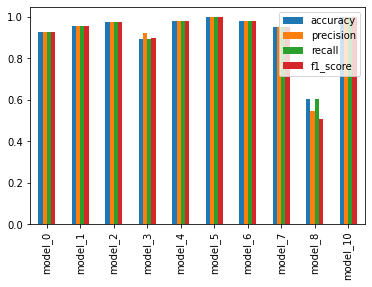

In [136]:
dataframe.plot.bar()